In [1]:
import os
import time
import tensorflow as tf
import scipy.io as sio 
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenetv2 import MobileNetV2
from keras.applications.mobilenet import MobileNet
import keras


c:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\frame

In [2]:

def one_hot_matrix(labels, C):
    
    ### START CODE HERE ###
    
    # Create a tf.constant equal to C (depth), name it 'C'.
    depth = tf.constant(C, name = "C")
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(labels, depth, axis=0)
    
    # Create the session
    sess = tf.Session()
    
    # Run the session
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session.
    sess.close() 
    
    return one_hot

In [3]:
from sklearn.utils import shuffle
file_path = os.getcwd() + '\\train'
label_name = os.listdir(file_path)
class_num = 3

matfn='bw_v2.mat' 
data=sio.loadmat(matfn) 


X_train = data['X_data'] 
X_train = X_train/255
Y_train = data['Y_data']
# Y_train = Y_train.T

# X_train, Y_train = shuffle(X_train, Y_train)



"""
X_val = X_train[4200:]
Y_val = Y_train[4200:]

X_train = X_train[:4200]
Y_train = Y_train[:4200]
"""

print(X_train.shape)
print(Y_train.shape)

(2520, 32, 32, 1)
(1, 2520)


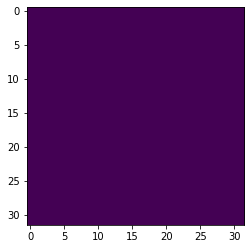

In [4]:
import matplotlib.pyplot as plt
import numpy as np
im_array = np.array(X_train[1000])
plt.imshow(im_array)

In [6]:
from sklearn.utils import shuffle
file_path = os.getcwd() + '\\train'
label_name = os.listdir(file_path)
class_num = 3

matfn_valid='valid_messy_128.mat' 
data=sio.loadmat(matfn_valid) 


X_valid = data['X_data'] 
X_valid = X_valid/255 
Y_valid = data['Y_data']
# Y_train = Y_train.T

# X_train, Y_train = shuffle(X_train, Y_train)



"""
X_val = X_train[4200:]
Y_val = Y_train[4200:]

X_train = X_train[:4200]
Y_train = Y_train[:4200]
"""

print(X_valid.shape)
print(Y_valid.shape)

(93, 128, 128, 3)
(1, 93)


In [4]:
data_num = X_train.shape[0] 
Y_train = one_hot_matrix(Y_train, class_num)
Y_train = Y_train.T
Y_train = Y_train.reshape(data_num, class_num)
print(Y_train.shape)

(2520, 3)


In [7]:
valid_num = X_valid.shape[0] 
Y_valid = one_hot_matrix(Y_valid, class_num)
Y_valid = Y_valid.T
Y_valid = Y_valid.reshape(valid_num, class_num)
print(Y_valid.shape)

(93, 3)


In [5]:
print(Y_train)
print(Y_train.shape)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(2520, 3)


In [6]:
import random
num_examples = X_train.shape[0]
index_list = list(range(num_examples))
random.shuffle(index_list)

# 根据打乱后的索引重新排列训练数据和标签
X_train = X_train[index_list]
Y_train = Y_train[index_list]

In [10]:
import random
num_examples = X_valid.shape[0]
index_list = list(range(num_examples))
random.shuffle(index_list)

# 根据打乱后的索引重新排列训练数据和标签
X_valid = X_valid[index_list]
Y_valid = Y_valid[index_list]

In [7]:
print(Y_train[0:200])
print(Y_train.shape)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0.

In [12]:
print(Y_valid)
print(Y_valid.shape)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1.

In [15]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

# early_stopping : val_loss 連續不降低時，結束訓練
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1,restore_best_weights=True,mode='auto')
# reduce_lr : val_loss 連續不降低時，減少learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='auto',
                            epsilon=0.0001, cooldown=0, min_lr=0)

checkpoint = ModelCheckpoint('ResNet50_Samll_v1.h5', monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

model = ResNet50(input_shape = (32, 32, 3), weights=None, classes=3)


model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [17]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x=X_train, y=Y_train, validation_data=(X_valid, Y_valid), epochs=50, batch_size = 32, callbacks=[early_stopping,checkpoint,reduce_lr])
        
# complete_time=time.strftime("%Y_%m_%d %H_%M_%S", time.localtime()) 
# model.save('MobileNet_'+str(complete_time)+'.h5')

Train on 2320 samples, validate on 93 samples
Epoch 1/50
2320/2320 [==============================] - 260s 112ms/step - loss: 2.0796 - acc: 0.3711 - val_loss: 4.3726 - val_acc: 0.3763

Epoch 00001: val_loss improved from inf to 4.37257, saving model to ResNet50_Samll_v1.h5
Epoch 2/50
2320/2320 [==============================] - 244s 105ms/step - loss: 1.4373 - acc: 0.4599 - val_loss: 1.2498 - val_acc: 0.4409

Epoch 00002: val_loss improved from 4.37257 to 1.24985, saving model to ResNet50_Samll_v1.h5
Epoch 3/50
2320/2320 [==============================] - 240s 104ms/step - loss: 1.4187 - acc: 0.4422 - val_loss: 2.6507 - val_acc: 0.3548

Epoch 00003: val_loss did not improve from 1.24985
Epoch 4/50
2320/2320 [==============================] - 244s 105ms/step - loss: 1.2571 - acc: 0.5366 - val_loss: 2.0981 - val_acc: 0.3763

Epoch 00004: val_loss did not improve from 1.24985
Epoch 5/50
2320/2320 [==============================] - 246s 106ms/step - loss: 1.3570 - acc: 0.5560 - val_loss: 5

KeyboardInterrupt: 

In [8]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

# early_stopping : val_loss 連續不降低時，結束訓練
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1,restore_best_weights=True,mode='auto')
# reduce_lr : val_loss 連續不降低時，減少learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='auto',
                            epsilon=0.0001, cooldown=0, min_lr=0)

checkpoint = ModelCheckpoint('MobileV2_bw.h5', monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

base_model = MobileNetV2(input_shape = (32, 32, 1), weights=None, classes=class_num)

base_model.summary()

Instructions for updating:
Colocations handled automatically by placer.


c:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   288         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [10]:
optimizer = keras.optimizers.Adam(lr=0.001)

base_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history = base_model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=50, batch_size = 64, callbacks=[early_stopping,checkpoint,reduce_lr])
        

Instructions for updating:
Use tf.cast instead.
Train on 2016 samples, validate on 504 samples
Epoch 1/50
2016/2016 [==============================] - 63s 31ms/step - loss: 0.7890 - acc: 0.6840 - val_loss: 7.7821 - val_acc: 0.4187

Epoch 00001: val_loss improved from inf to 7.78205, saving model to MobileV2_bw.h5
Epoch 2/50
2016/2016 [==============================] - 48s 24ms/step - loss: 0.1929 - acc: 0.9365 - val_loss: 1.3848 - val_acc: 0.8591

Epoch 00002: val_loss improved from 7.78205 to 1.38481, saving model to MobileV2_bw.h5
Epoch 3/50
2016/2016 [==============================] - 44s 22ms/step - loss: 0.0499 - acc: 0.9807 - val_loss: 0.5084 - val_acc: 0.9286

Epoch 00003: val_loss improved from 1.38481 to 0.50836, saving model to MobileV2_bw.h5
Epoch 4/50
2016/2016 [==============================] - 42s 21ms/step - loss: 0.0458 - acc: 0.9841 - val_loss: 1.0489 - val_acc: 0.9008

Epoch 00004: val_loss did not improve from 0.50836
Epoch 5/50
2016/2016 [===========================

KeyboardInterrupt: 

In [11]:
print(Y_train[:200])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0.

In [12]:
from keras import models
name='MobileV2_bw.h5'
model = models.load_model(name)
model.predict(X_train[0:100])

array([[1.00000000e+00, 7.11087134e-10, 1.35890271e-10],
       [5.34126184e-06, 9.97160554e-01, 2.83410703e-03],
       [5.56162192e-08, 9.99997258e-01, 2.74507261e-06],
       [4.65577468e-05, 9.99946713e-01, 6.67509903e-06],
       [1.00000000e+00, 6.88850157e-11, 2.11361935e-11],
       [1.00000000e+00, 6.70968281e-10, 2.63557925e-11],
       [1.00000000e+00, 8.61214876e-18, 1.16401567e-20],
       [1.62411692e-19, 2.83390095e-27, 1.00000000e+00],
       [5.54186430e-09, 9.99999881e-01, 1.11088397e-07],
       [1.00000000e+00, 1.19624142e-14, 8.37684648e-18],
       [7.69312223e-08, 2.19226970e-10, 9.99999881e-01],
       [6.19761062e-18, 2.67482913e-25, 1.00000000e+00],
       [1.00000000e+00, 4.28284083e-15, 1.21316873e-18],
       [1.55883674e-06, 9.99994159e-01, 4.25259122e-06],
       [9.99933124e-01, 4.32590678e-05, 2.35898806e-05],
       [5.64974760e-12, 3.56771866e-16, 1.00000000e+00],
       [1.00000000e+00, 1.37829304e-09, 2.70644174e-10],
       [1.20879657e-14, 5.55795